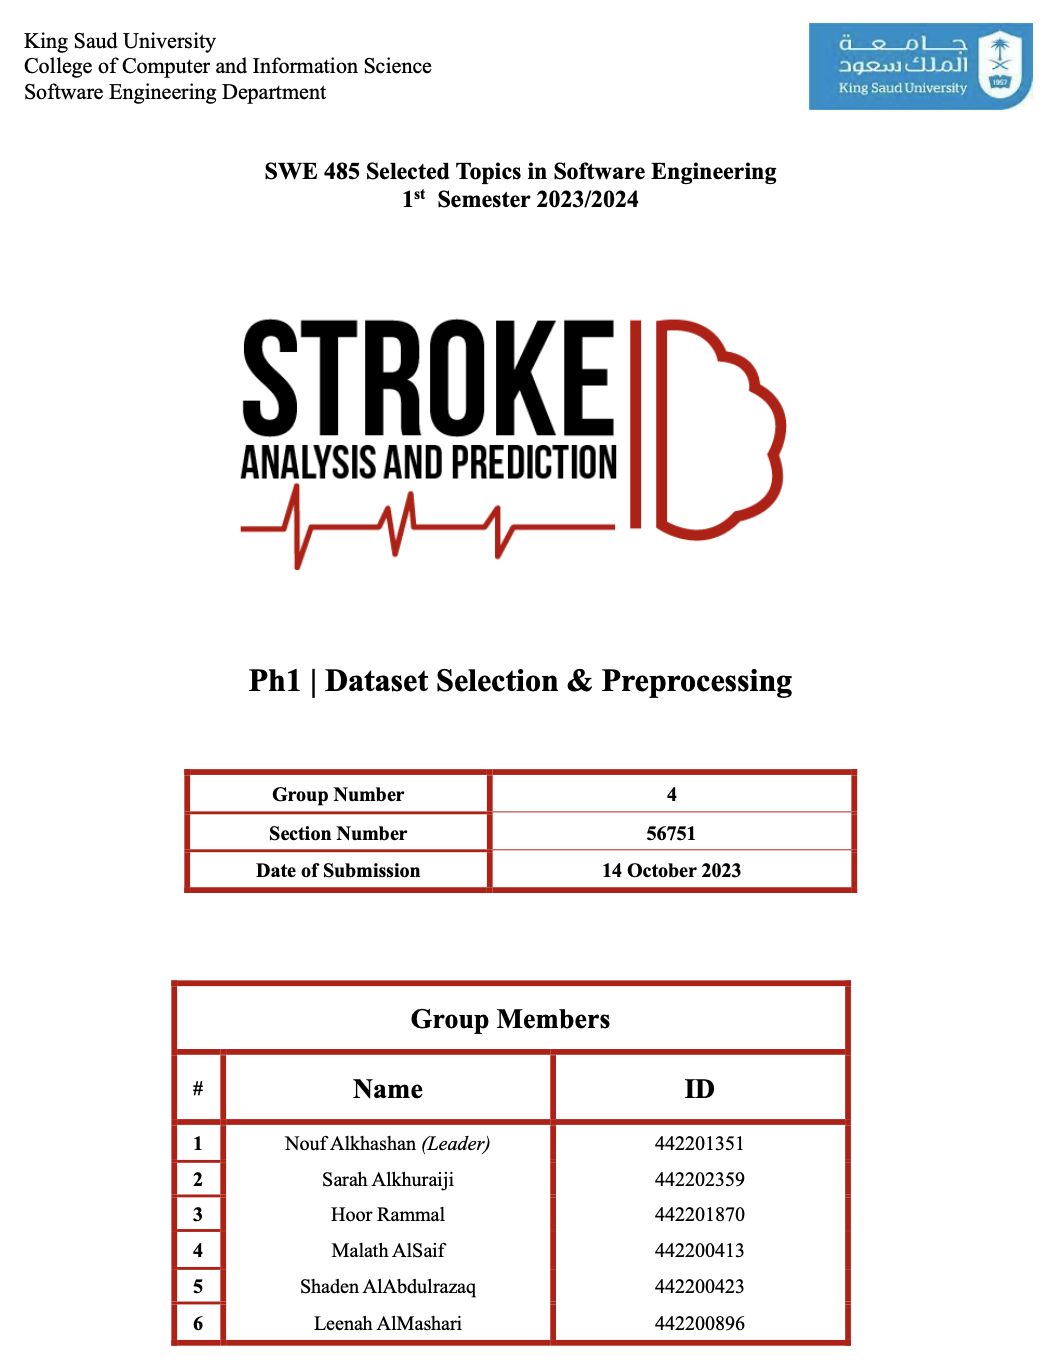

**Table Of Content:**

    1- Goal Of Collecting Dataset. ✔️
    2- Source of Dataset. **
    3- General Information about Dataset:
        a. number and type of variables. ✔️
        b. number of observation. ✔️
        c. number of labels.✔️
    4- Summary of Dataset:
        a. sample of raw. ✔️
        b. variables distribution.✔️
        c. missing values. ✔️
        d. statistical summaries. **
    5- Preprocessing Technique Used. **
    

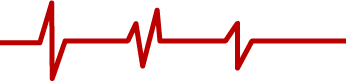
> ## 1- Goal of collecting Dataset:

    Utilizing a stroke dataset for a machine learning (ML) project offers the opportunity to harness the power of data-driven insights to address key aspects of stroke prevention, diagnosis, and treatment. 

    By employing ML algorithms and techniques, We can develop predictive models to identify individuals at risk of stroke, improve diagnostic accuracy, and optimize treatment recommendations. Additionally, the dataset can serve as a valuable resource for feature engineering, training and testing ML models, and evaluating their performance. 
    
    The ultimate goal is to create tools and solutions that can positively impact stroke patients' lives by enabling earlier intervention and better healthcare decisions based on data-driven insights.

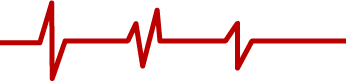
> ## 2- Source of Dataset:

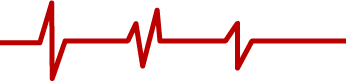
> ## 3- General Information about Dataset:

**a. number and type of variables:**

we have 11 variables which are:    
    
    1. id: unique identifier as int.
    
    2. gender: "Male", "Female" or "Other" as object.
        
    3. age: age of the patient as float.
    
    4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension as int.

    5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease as int.

    6. ever_married: "No" or "Yes" as object.

    7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" as object.

    8. Residence_type: "Rural" or "Urban" as object.

    9. avg_glucose_level: average glucose level in blood as float.

    10. bmi: body mass index as float.

    11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* as object.


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

As an output, there is:
stroke: 1 if the patient had a stroke or 0 if not as int.

**b. number of observation:**

There exists 5110 instances of observation.

**c. number of labels:**

the lables are: 
has a stroke = 1 or No stroke = 0.

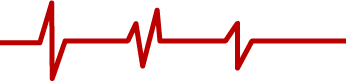
> ## 4- Summary of Dataset:

First, we'll import libraries then read CSV file. 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

<class 'ModuleNotFoundError'>: No module named 'imblearn'

In [9]:
df = pd.read_csv('/Users/mac/Downloads/healthcare-dataset-stroke-data.csv')
#df=df.drop('id', axis=1)
df.head()

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: '/Users/mac/Downloads/healthcare-dataset-stroke-data.csv'

**a. sample of raw.**

**b. variables distribution:**

we'll take about (), others will be disscussed in the statistical part.

> **1.Gender:**

In [ ]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
fig.show()

> **2.Hypertension:**

In [ ]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

> **3. Heart Disease:**

In [ ]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

> **4. Married:**

In [ ]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

> **5. Work Type:**

In [ ]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='work_type', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

> **6. Residence Type:**

In [ ]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

> **7. Smoking:**

In [ ]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

> **8. Stroke:**

In [ ]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

**c. missing values:**

In [ ]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

> **1. BMI:**

We have missing values on the 'bmi', which is at around %4.
We will handle it in the Preprocessing part.

**d. statistical summaries with mean and variance:**

> **1. Categorical:**

In [ ]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']
df[categorical].describe()

> **2. Numerical:**

In [ ]:
numerical = ['age','avg_glucose_level', 'bmi']
df[numerical].describe()
#print(np.var(df))

We have three numerical features in our dataset.

All of our numerical features are measured in different scales.

Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

let's see the Skewness.

In [ ]:
df[numerical].skew()

df[numerical].hist(figsize=(8,6));

Based on the result, age has slight left skew, other two features have right tail, positively skewed shape distribution.

We will deal with different scale and skewness in the Preprocessing part.

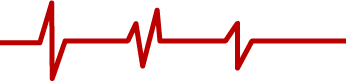
> ## 5- Preprocessing Technique Used.

> 1. Variable Removal for ID:

there is no need for ID since it not relevant or effect the prediction of having a stroke or not. So, 

In [ ]:
#df = df.drop('id', axis=1)

> 2. Missing Value of BMI:

we will solve the problem by using pipeline during the modeling.

Pipeline: 

> 3. Skewness of age, average glucose, IBM:

> 4. White Space Removal: